In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia
...,...,...,...,...,...,...
32465,32465,한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...,"{'word': '유기준', 'start_idx': 93, 'end_idx': 95...","{'word': '부산 서구·동구', 'start_idx': 100, 'end_id...",per:employee_of,wikitree
32466,32466,"법포는 다시 최시형, 서병학, 손병희 직계인 북접과 다시 서장옥, 전봉준, 김개남을...","{'word': '최시형', 'start_idx': 7, 'end_idx': 9, ...","{'word': '손병희', 'start_idx': 17, 'end_idx': 19...",per:colleagues,wikipedia
32467,32467,완도군(군수 신우철)이 국토교통부에서 실시한 '2019 교통문화지수 실태조사'에서 ...,"{'word': '완도군', 'start_idx': 0, 'end_idx': 2, ...","{'word': '신우철', 'start_idx': 7, 'end_idx': 9, ...",org:top_members/employees,wikitree
32468,32468,"중앙일보, JTBC 회장을 지낸 이후 중앙홀딩스 회장, 재단법인 한반도평화만들기 이...","{'word': 'JTBC', 'start_idx': 6, 'end_idx': 9,...","{'word': '중앙홀딩스', 'start_idx': 21, 'end_idx': ...",no_relation,wikipedia


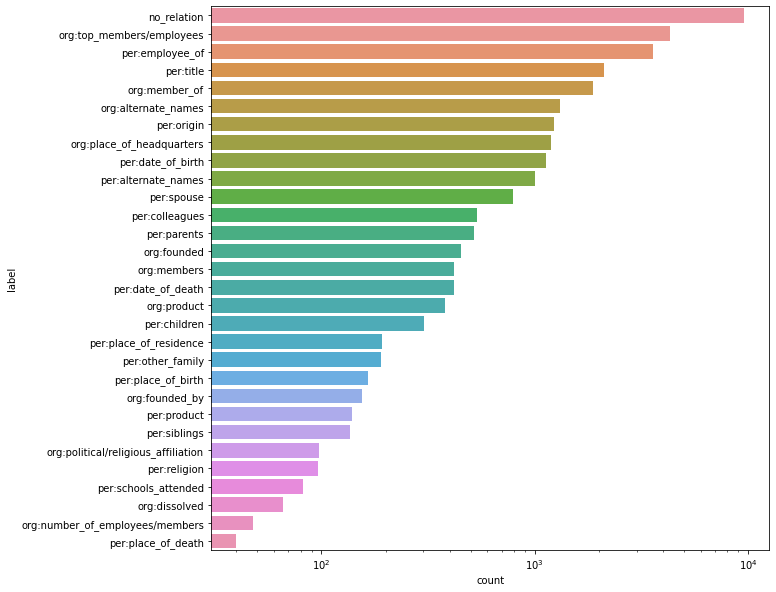

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

plot = sns.countplot(y=df['label'], order=df['label'].value_counts().index, ax=ax)
plot.set_xscale('log')

In [3]:
sub_types = ['ORG', 'PER']
obj_types = ['DAT', 'ORG', 'LOC', 'POH', 'PER', 'NOH']

df_by_type = {type: df[df['subject_entity'].apply(lambda x: eval(x)['type'] == type)] for type in sub_types}

possibles = {}
for sub_type in sub_types:
    for obj_type in obj_types:
        possibles[(sub_type, obj_type)] = df_by_type[sub_type][df_by_type[sub_type]['object_entity'].apply(lambda x: eval(x)['type'] == obj_type)]['label'].unique()

In [29]:
# for k in possibles:
#     print(f'{k}\t{possibles[k]}\nlen: {len(possibles[k])}\n')

('ORG', 'DAT')	['no_relation' 'org:founded' 'org:dissolved' 'org:member_of'
 'org:place_of_headquarters' 'org:members'
 'org:political/religious_affiliation' 'org:alternate_names']
len: 8

('ORG', 'ORG')	['no_relation' 'org:member_of' 'org:alternate_names' 'org:members'
 'org:product' 'org:political/religious_affiliation'
 'org:place_of_headquarters' 'org:founded_by' 'org:top_members/employees']
len: 9

('ORG', 'LOC')	['org:place_of_headquarters' 'org:members' 'org:member_of' 'no_relation'
 'org:product' 'org:alternate_names' 'org:top_members/employees'
 'org:political/religious_affiliation']
len: 8

('ORG', 'POH')	['org:alternate_names' 'org:political/religious_affiliation' 'no_relation'
 'org:member_of' 'org:product' 'org:place_of_headquarters' 'org:members'
 'org:top_members/employees' 'org:founded_by']
len: 9

('ORG', 'PER')	['no_relation' 'org:top_members/employees' 'org:founded_by'
 'org:alternate_names' 'org:product' 'org:place_of_headquarters'
 'org:political/religious_affiliat

In [5]:
def get_conditioned(df, sub_type, obj_type, label):
    return df[df['subject_entity'].apply(lambda x: eval(x)['type'] == sub_type) & df['object_entity'].apply(lambda x: eval(x)['type'] == obj_type) & df['label'].apply(lambda x: x == label)]

def get_drop_idxs(df, sub_type, obj_type, label):
    return get_conditioned(df, sub_type, obj_type, label).index.tolist()

get_conditioned(df, sub_type='ORG', obj_type='DAT', label='org:members')

,id,sentence,subject_entity,object_entity,label,source
18065,18065,2001년 3월 28일부터 2003년 12월 24일까지 바실리예프는 러시아 내무부 ...,"{'word': '러시아', 'start_idx': 38, 'end_idx': 40...","{'word': '모스크바', 'start_idx': 58, 'end_idx': 6...",org:members,wikipedia
